In [1]:
import networkx as nx
G=nx.DiGraph()

G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [2]:
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import json
import networkx as nx

In [3]:
print G.number_of_nodes()
print G.number_of_edges()

8
2


In [4]:
print G.nodes()
print G.edges()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']
[(1, 2), (1, 3)]


In [5]:
G.add_edge(2,1)

In [6]:
print G.edges()

[(1, 2), (1, 3), (2, 1)]


In [7]:
G[1]

{2: {}, 3: {}}

In [8]:
G.node[1]['name']="2D-map"
G.node[2]['name']="3D-zonal-map"

In [9]:
G.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [10]:
G.node[2]['name']

'3D-zonal-map'

In [11]:
G.nodes()

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [12]:
G.successors(1)


[2, 3]

In [13]:
G.successors(2)

[1]

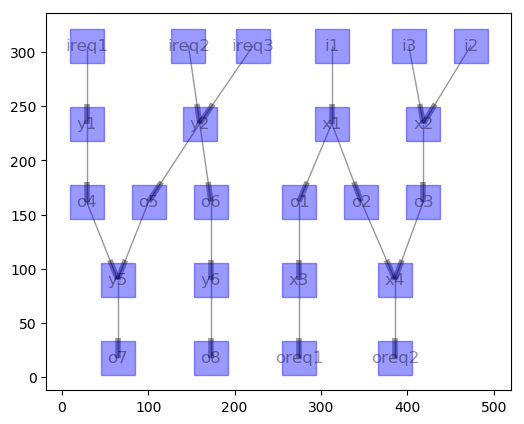

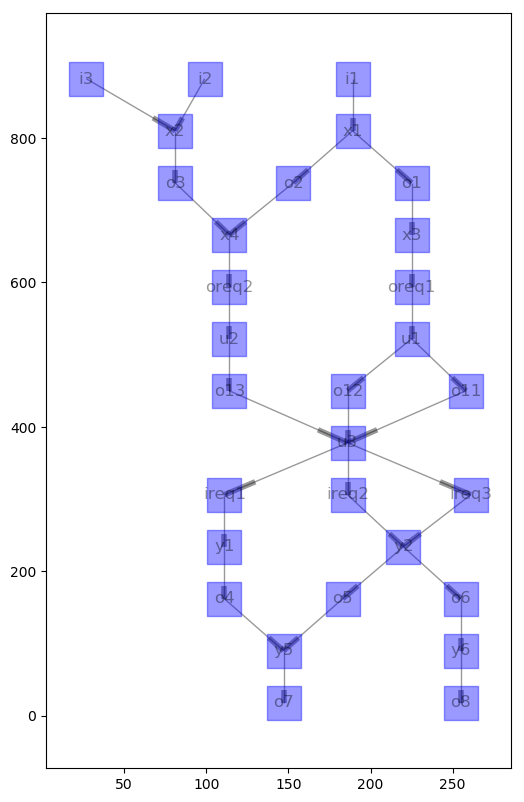

['o8:0', 'o7:0']
['i1:0', 'i3:0', 'i2:0']


{}

In [54]:
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import json
import networkx as nx
import pygraphviz
fig = plt.figure(figsize=(6, 5), dpi=100)
G =nx.DiGraph()
G.add_edges_from([("i1","x1"),("i2","x2"),("i3","x2"),("x1","o1"),("x1","o2"),("x2","o3"),("o1","x3")
                 ,("o2","x4"),("o3","x4"),("x3","oreq1"),("x4","oreq2")])
G.add_edges_from([("ireq1","y1"),("ireq2","y2"),("ireq3","y2"),("y1","o4"),("y2","o5"),("y2","o6"),("o4","y5")
                 ,("o5","y5"),("o6","y6"),("y5","o7"),("y6","o8")])



position = nx.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=position, node_shape='s', node_color='b', alpha=0.4, node_size=600)
#plt.set_size_inches(18.5, 10.5)
plt.show() 
                     
Uow1 = nx.DiGraph()
Uow1.add_edges_from([("u1","o11"),("u1","o12"),("u2","o13"),("o11","u3"),("o12","u3"),("o13","u3")])

MIX = nx.compose(Uow1, G)
MIX.add_edges_from([("oreq1","u1"),("oreq2","u2"),("u3","ireq1"),("u3","ireq2"),("u3","ireq3")])

fig = plt.figure(figsize=(6, 10), dpi=100)
position = nx.nx_agraph.graphviz_layout(MIX, prog='dot')
nx.draw_networkx(MIX, pos=position, node_shape='s', node_color='b', alpha=0.4, node_size=600)
#plt.set_size_inches(18.5, 10.5)
plt.show() 
                   
#find all input req
degrees = [name + ":" +str(deg) for (name, deg) in MIX.out_degree() if deg==0]
print degrees

#find all output req
degrees = [name + ":" +str(deg) for (name, deg) in MIX.in_degree() if deg==0]
print degrees

G.node["o2"]

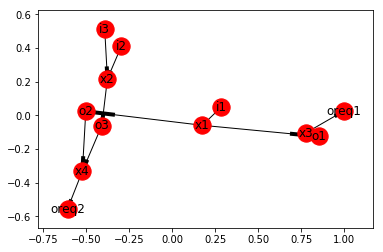

NodeView(('i1', 'oreq2', 'i3', 'i2', 'x4', 'x2', 'x3', 'x1', 'o3', 'o2', 'o1', 'oreq1'))

In [8]:
import matplotlib.pyplot as plt

nx.draw_networkx(G, prog='neato')
plt.show()
G.nodes()

In [15]:
G.remove_nodes_from('mps')

In [16]:
G.add_node(4, name="4D-map")

In [17]:
G.node[4]

{'name': '4D-map'}

In [24]:
G.nodes(name=True)

TypeError: nodes() got an unexpected keyword argument 'name'

In [19]:
nx.has_path(G,2,1)

True

In [20]:
nx.has_path(G,3,1)

False

In [21]:
import json
import networkx as nx
G=nx.DiGraph()

PROM_DIR = "/home/soc/Downloads/prom/prom-6.6-all-platforms/"
jsoned = ""
with open(PROM_DIR + "jsoned_workflow_1.txt", "rt") as fin:
    for line in fin:
        jsoned = jsoned + line
jsoned = json.loads(jsoned)
page = jsoned['pnml']['net']['page']

for p in page['place']:
    print p['@id']
    G.add_node(p['@id'], name = p['name']['text']['$'], sort = 'place')

for t in page['transition']:
    print t['@id']
    G.add_node(t['@id'], name = t['name']['text']['$'], sort = 'transition')
    
for a in page['arc']:
    print a['@id']
    G.add_edge(a['@source'], a['@target'], name = a['name']['text']['$'], sort = 'arc')

IOError: [Errno 2] No such file or directory: '/home/soc/Downloads/prom/prom-6.6-all-platforms/jsoned_workflow_1.txt'

In [22]:
import itertools
test_res = set(n for u,v,d in G.edges_iter(data=True)
               if d['sort']=='arc'
               for n in (u, v)
               if G.node[n]['sort']=='place')

print str(test_res)
comb = list(itertools.combinations(test_res,2))
uow = []
print comb
for i in comb:
    for j in G.successors(i[0]):
        if nx.has_path(G, j, i[1]):
            print (i[0], i[1])
            uow.append((i[0], i[1]))
            break
print uow

set([])
[]
[]


In [26]:
from networkx.readwrite import json_graph
import pygraphviz

jsonRes = {"all_uows" : []}
for pair in uow:
    sub = nx.DiGraph()
    for path in nx.all_simple_paths(G, source=pair[0], target=pair[1]):         
        for node in path:
            sub.add_node(node)
    subG = nx.subgraph(G, sub)
    subG.nodes()
    tmpDict = {}
    for node in subG.nodes_iter():
        if subG.node[node]['name'] != 'tau from tree':
            tmpDict[node]=subG.node[node]['name']
        else:
            tmpDict[node]='Util'
        #print subG.node[node]['name']
    position = nx.nx_agraph.graphviz_layout(subG, prog='dot')
    nx.draw_networkx(subG, labels=tmpDict, pos=position, node_shape='s', node_color='g', alpha=0.4, node_size=600)
    #plt.set_size_inches(18.5, 10.5)
    plt.show()    
    jsonTmp = json_graph.node_link_data(subG)
    jsonRes['all_uows'].append(jsonTmp)
    
print json.dumps(jsonRes)

ImportError: No module named graphviz

In [27]:
from networkx.readwrite import json_graph
import pygraphviz

subG = nx.subgraph(G, sub)
nx.draw_networkx(subG, with_labels=True)
plt.show()
print subG.nodes()

jsonRes = json_graph.node_link_data(subG)
print json.dumps(jsonRes)

pos = nx.nx_agraph.graphviz_layout(subG)
print pos

ImportError: No module named pygraphviz

In [28]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


In [29]:
for node in subG.nodes_iter():
    print subG.node[node]['name']

NameError: name 'subG' is not defined

In [20]:
subG.nodes(data=True)

[(u'n9', {'name': u'2D_Map', 'sort': 'transition'}),
 (u'n10', {'name': u'Time-Series-for-Work-Flow', 'sort': 'transition'}),
 (u'n3', {'name': u'sink 3', 'sort': 'place'}),
 (u'n4', {'name': u'sink 4', 'sort': 'place'}),
 (u'n5', {'name': u'sink 5', 'sort': 'place'})]